In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('Results.csv')  

In [11]:
data_filtered = data.drop(columns=['Price/Earnings (TTM)', 'Price/Sales (TTM)', 'Moving Average Convergence Divergence (MACD)', 
                                  '50 & 200 Day SMA Cross'])

In [16]:
industries = data_filtered['Industry'].unique()

In [54]:
industries 

array(['Life Sciences Tools & Services', 'Metals & Mining',
       'Capital Markets',
       'Electronic Equipment, Instruments & Components',
       'Diversified Consumer Services', 'Road & Rail',
       'Real Estate Management & Development', 'Insurance',
       'Mortgage Real Estate Investment Trusts (REITs)',
       'Aerospace & Defense', 'Airlines', 'Specialty Retail',
       'Communications Equipment', 'Building Products', 'Machinery',
       'Technology Hardware, Storage & Peripherals', 'Food Products',
       'Hotels, Restaurants & Leisure',
       'Equity Real Estate Investment Trusts (REITs)',
       'Health Care Providers & Services', 'IT Services', 'Banks',
       'Oil, Gas & Consumable Fuels', 'Air Freight & Logistics',
       'Electrical Equipment', 'Thrifts & Mortgage Finance',
       'Biotechnology', 'Construction Materials', 'Beverages', '--',
       'Chemicals', 'Commercial Services & Supplies',
       'Health Care Equipment & Supplies', 'Software',
       'Profession

In [17]:
data_by_industry = data.groupby('Industry')

# change of stock prices for the last three months divided by industry: 

/Users/diegoleoro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/diegoleoro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


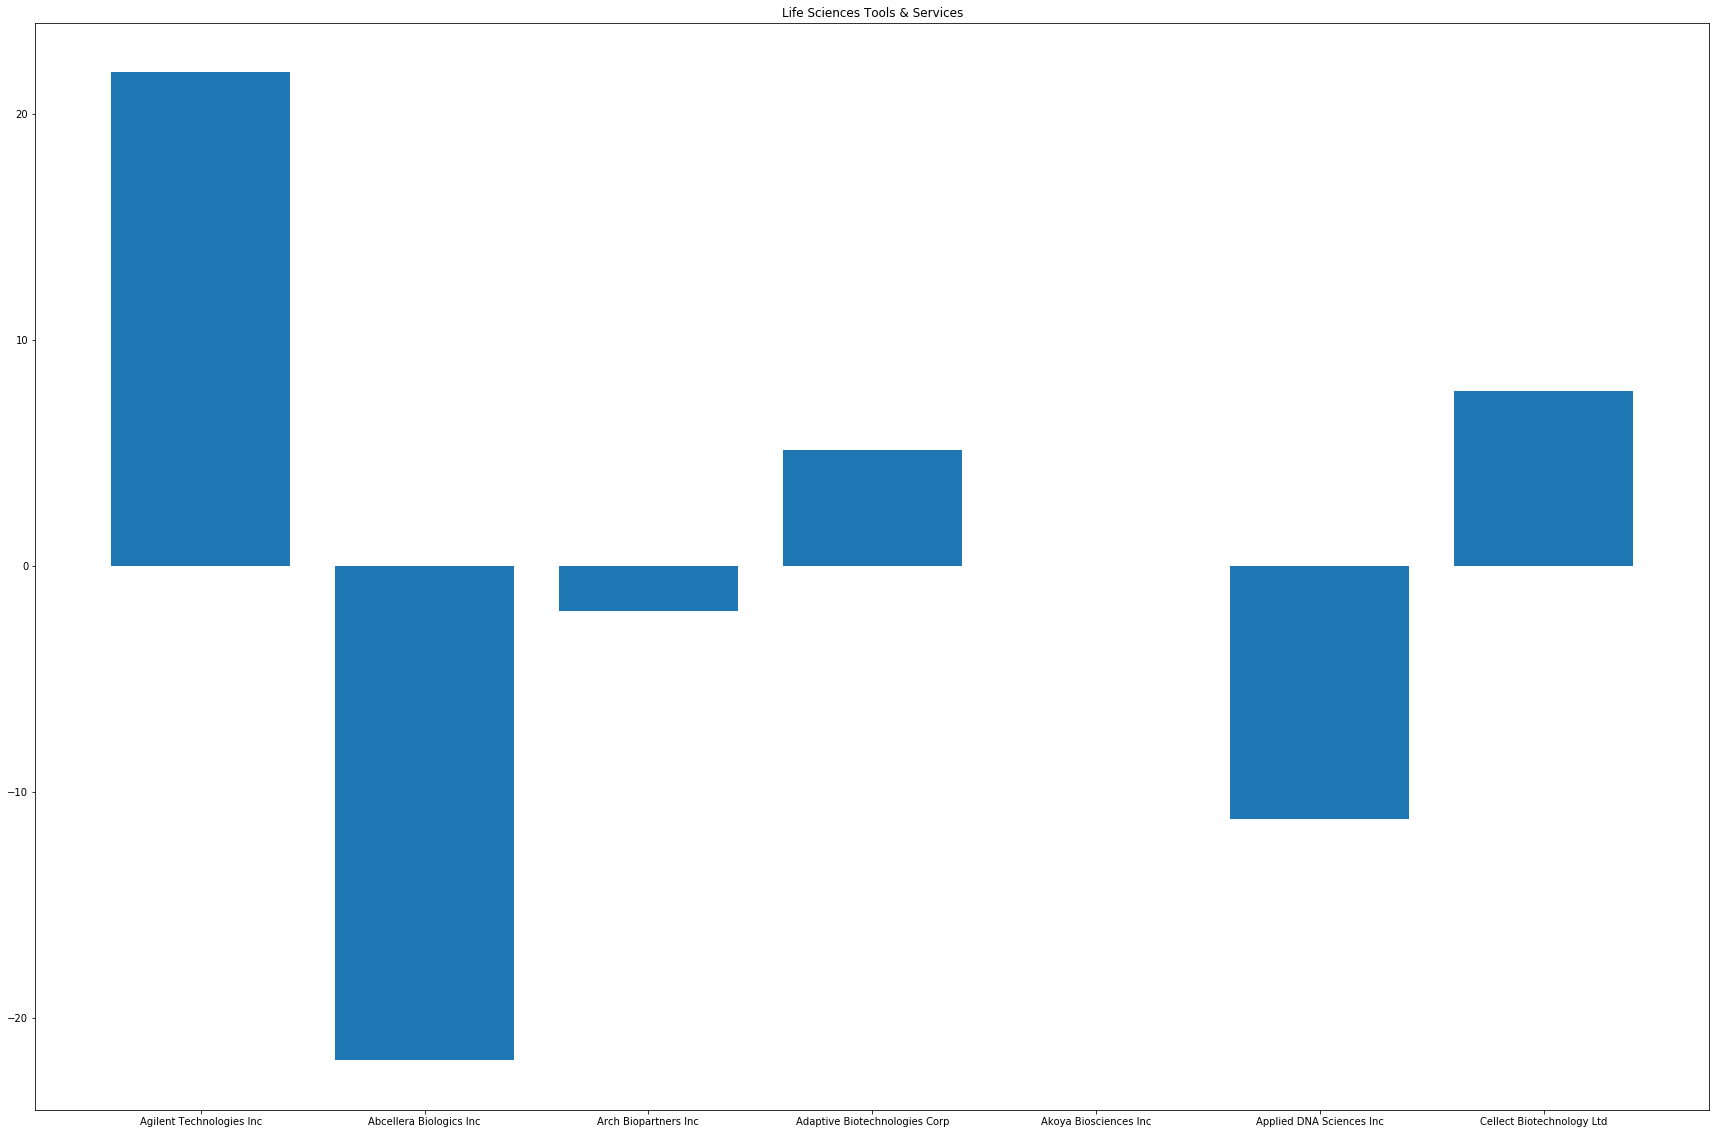

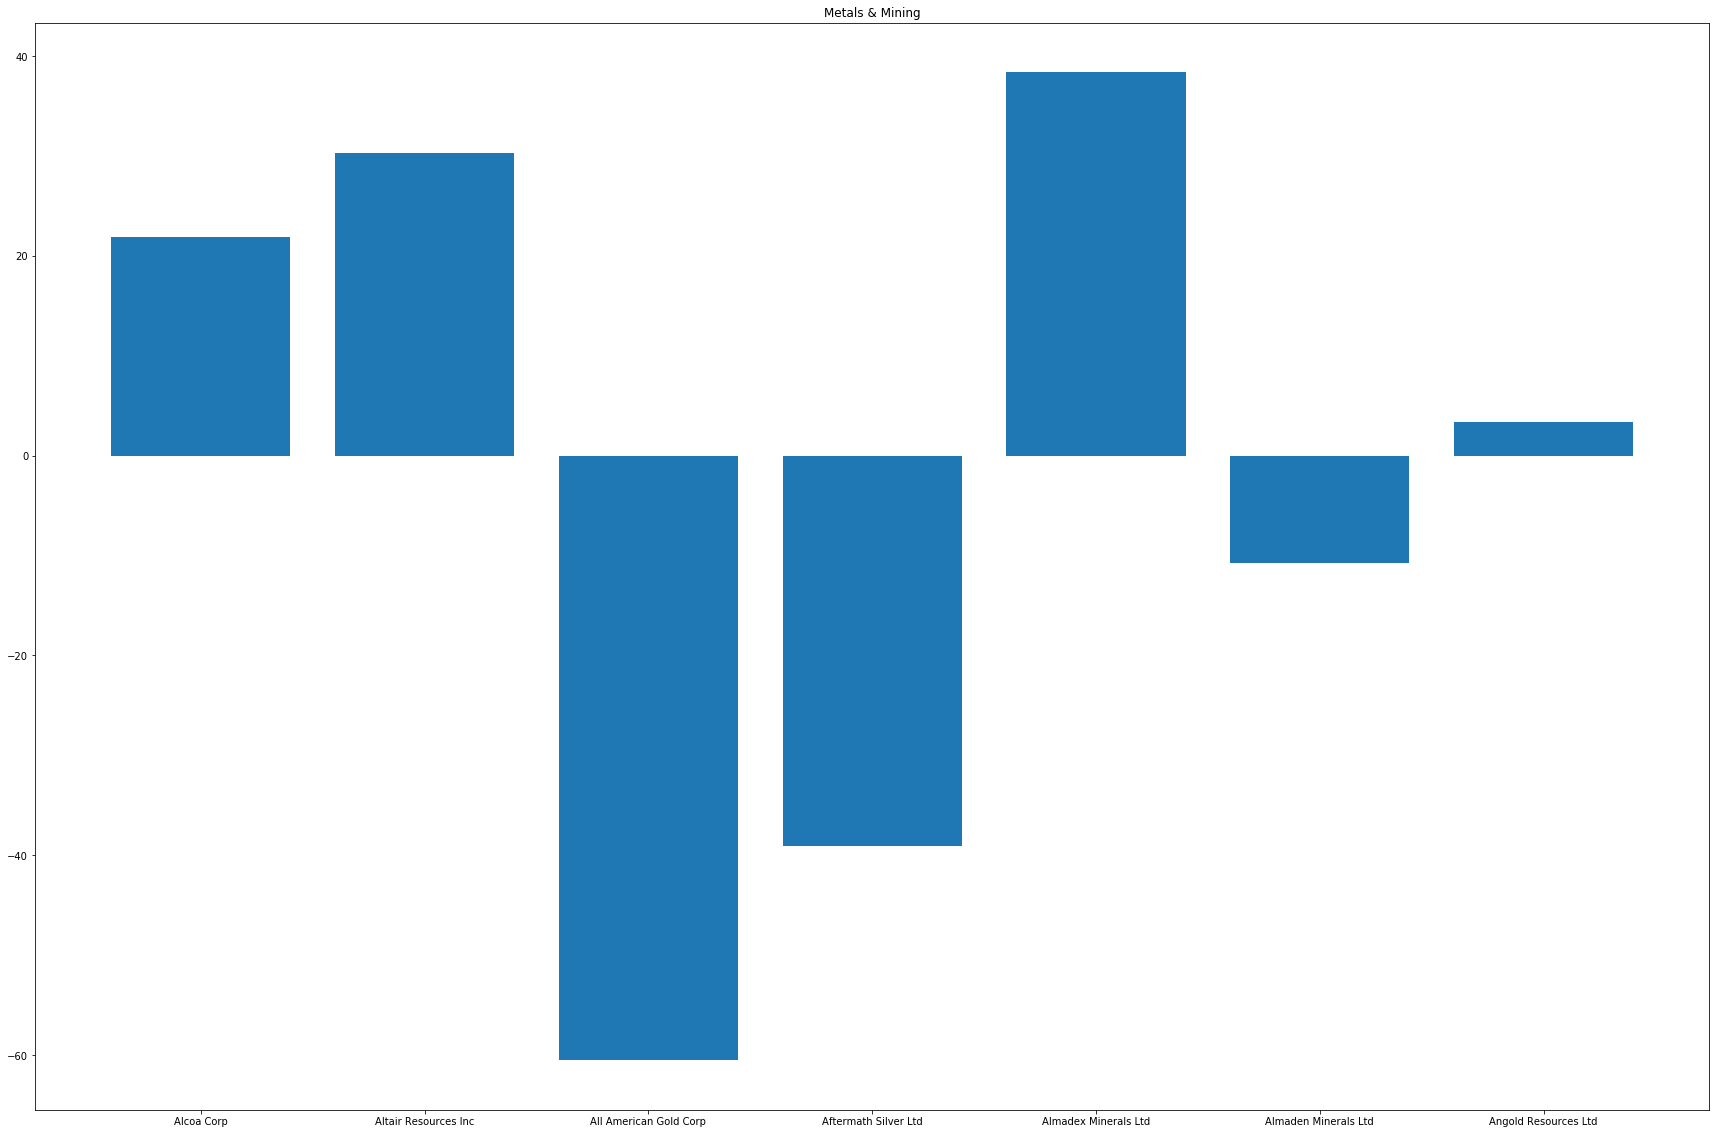

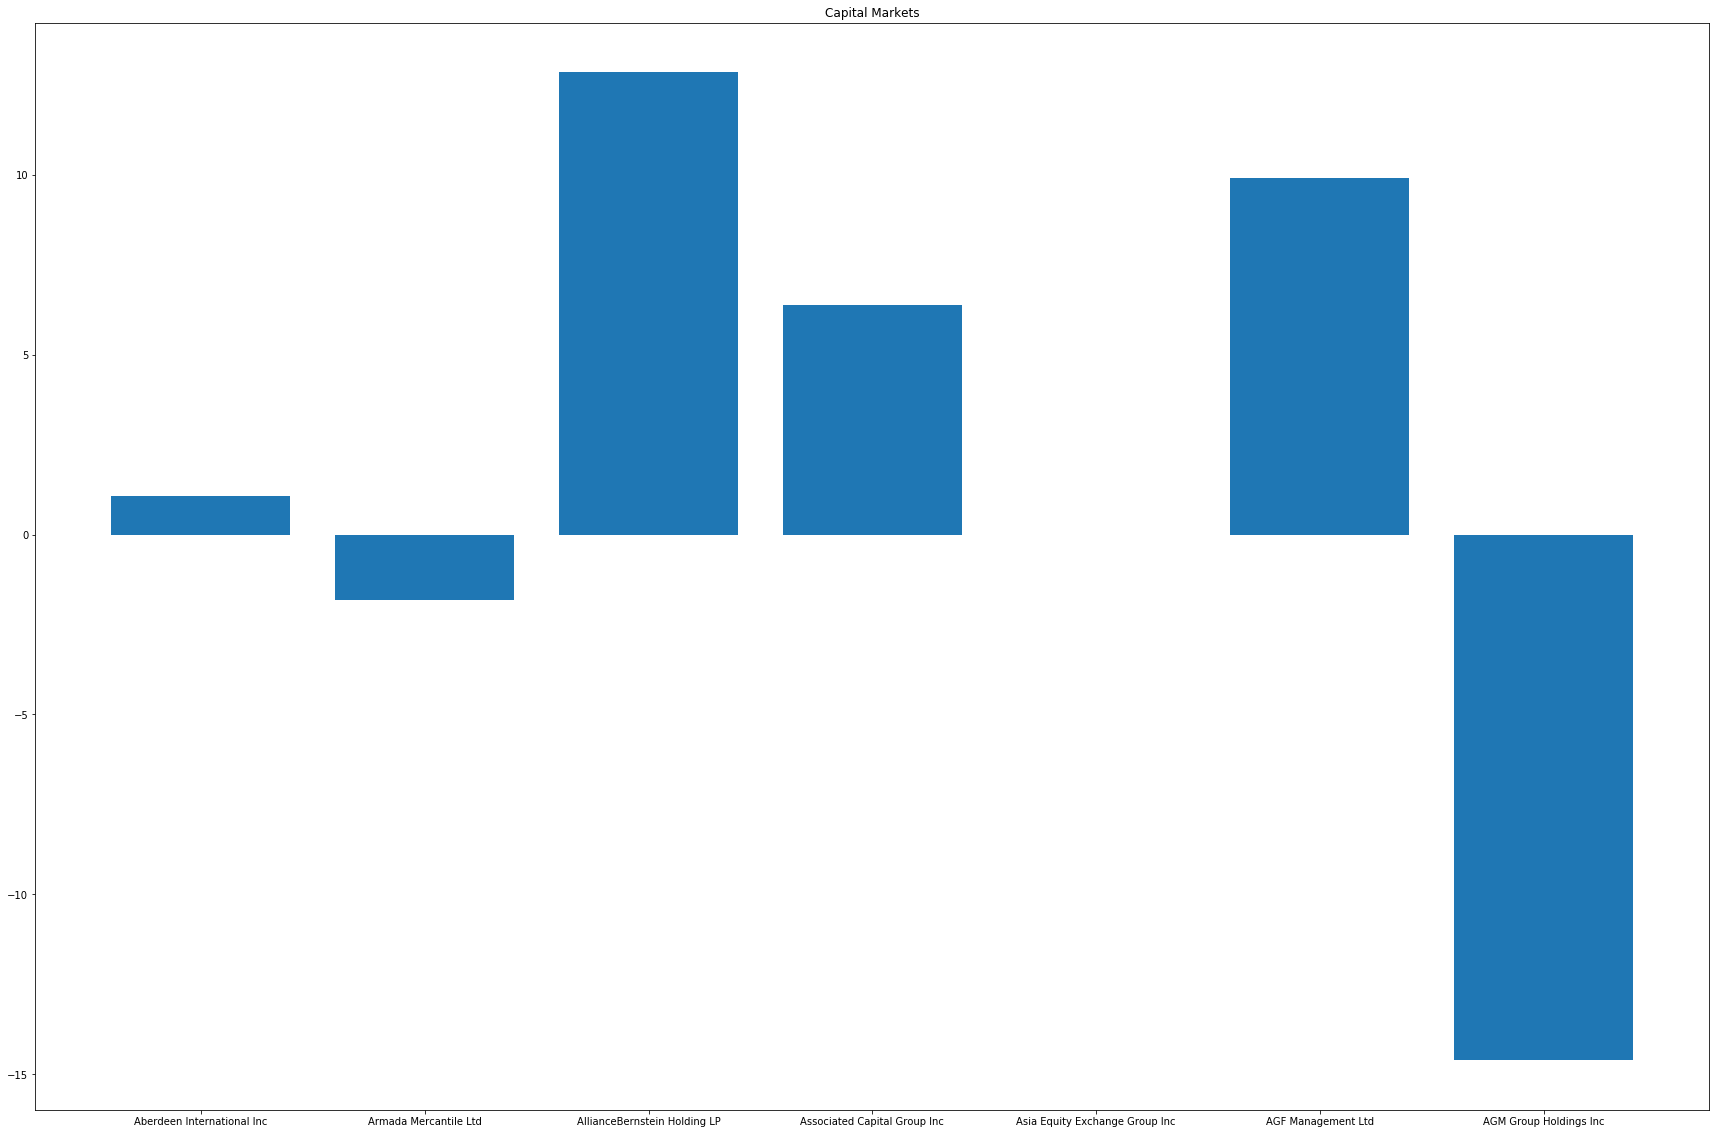

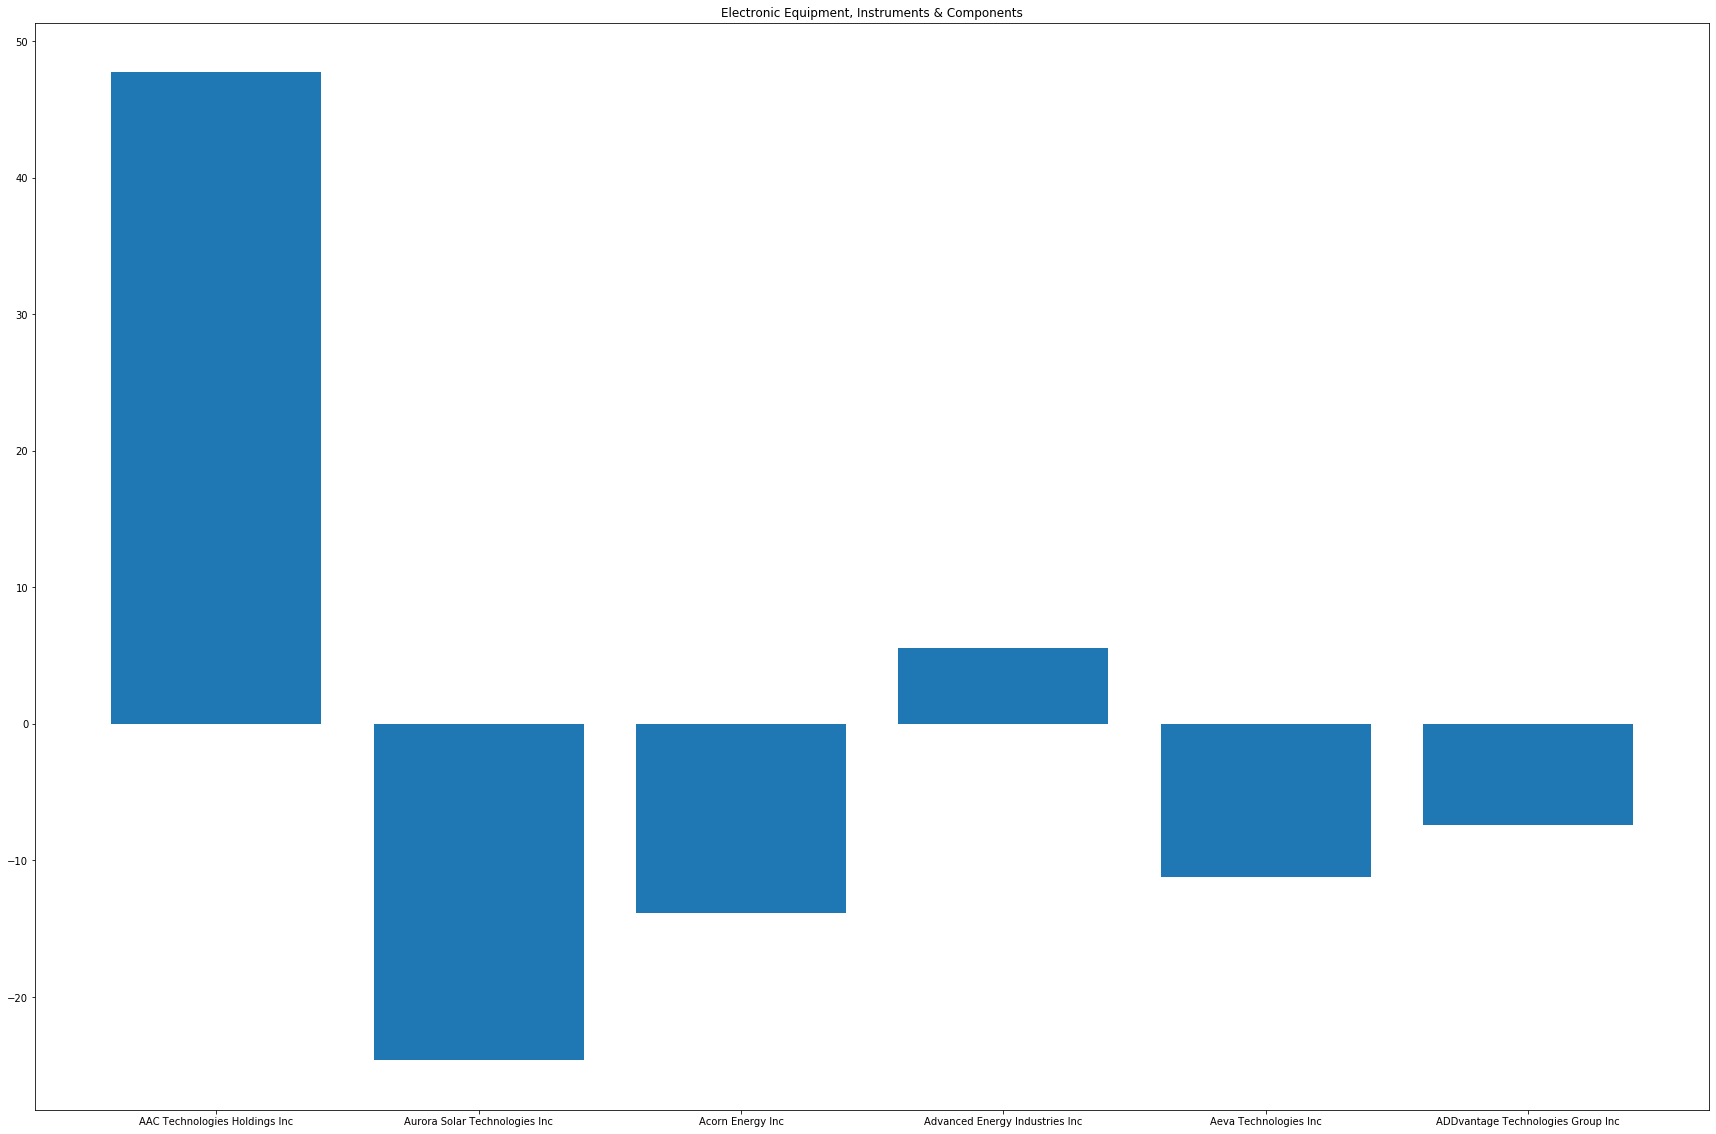

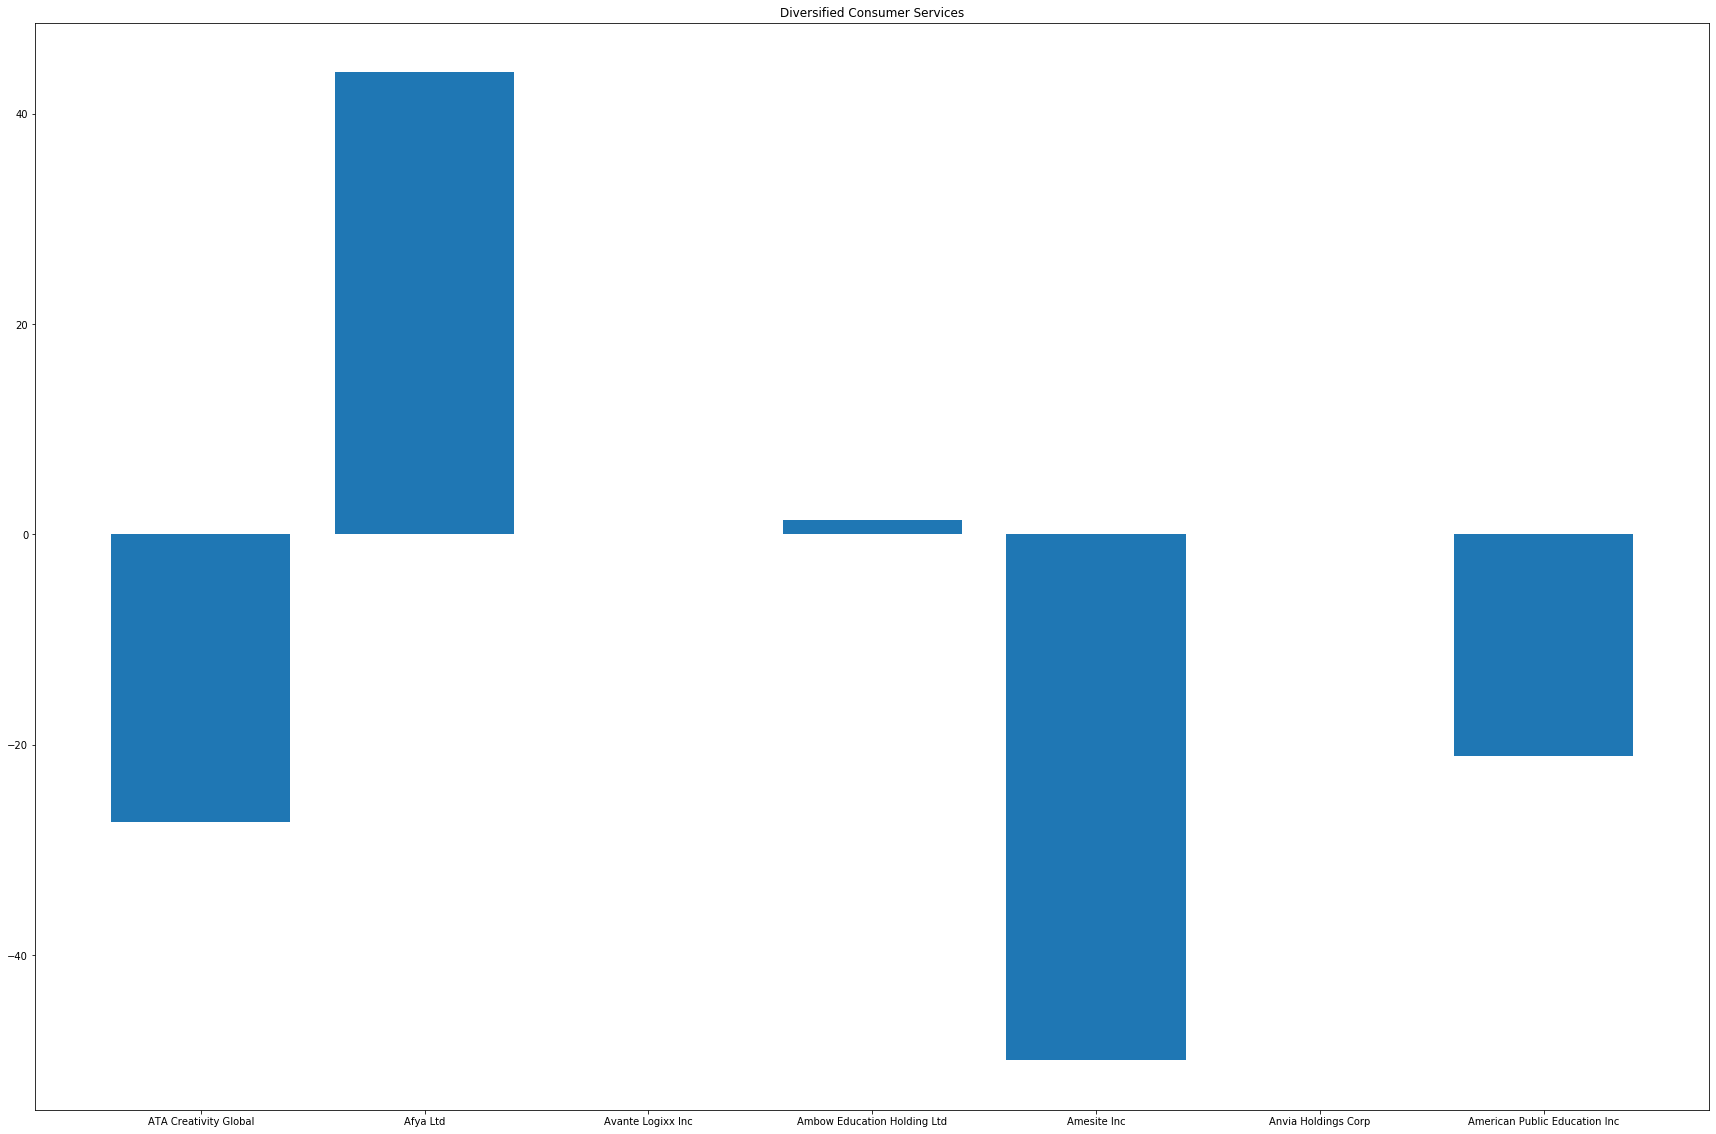

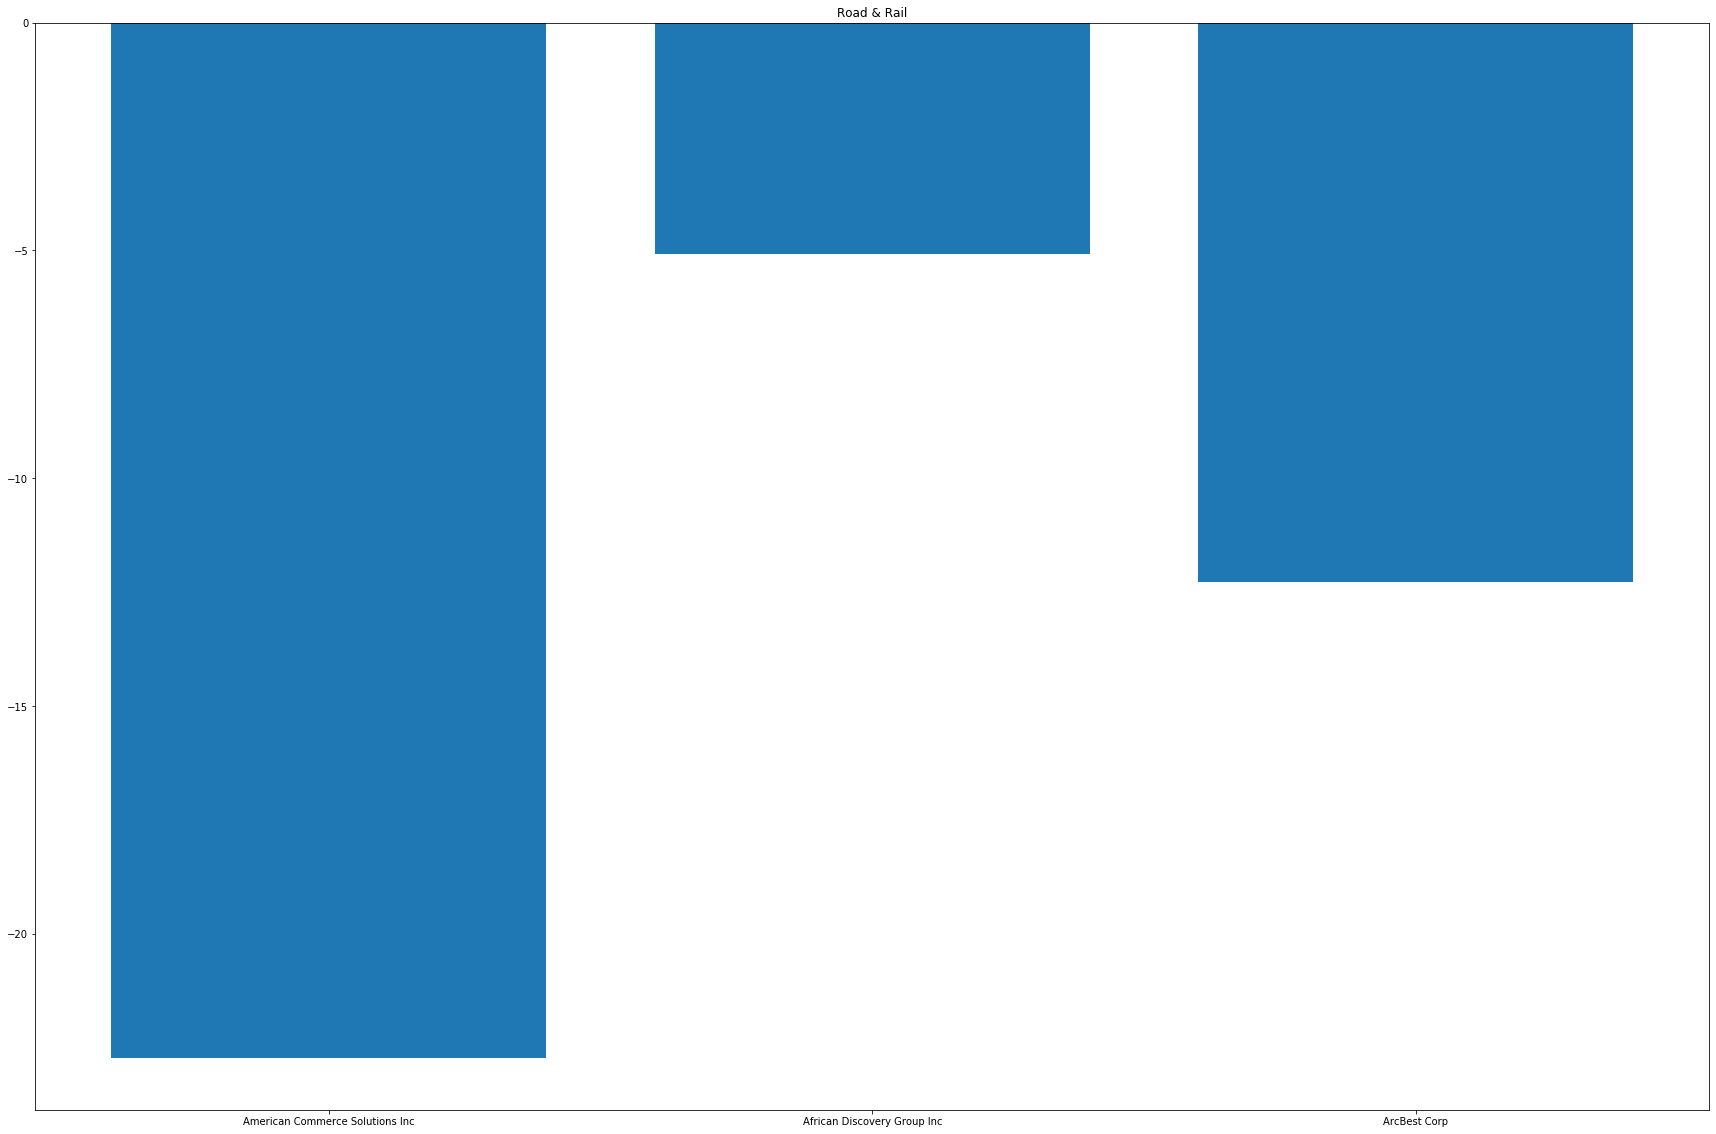

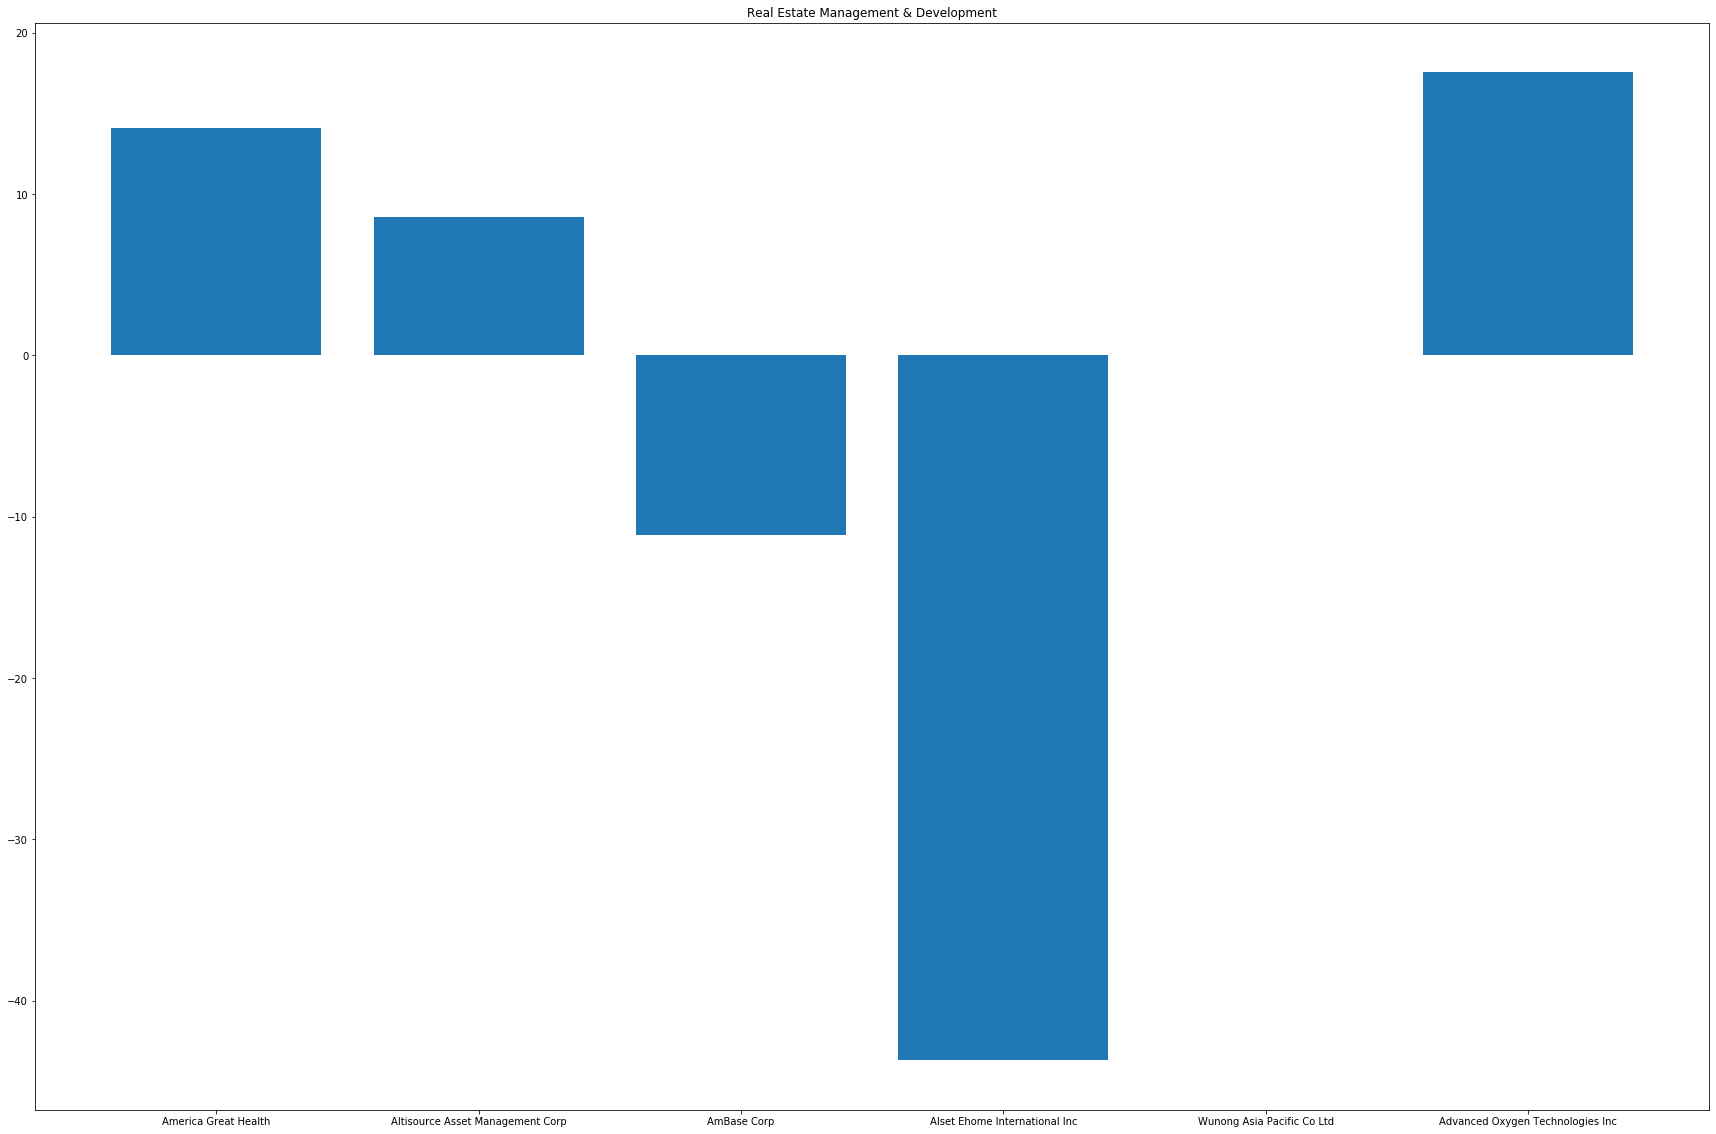

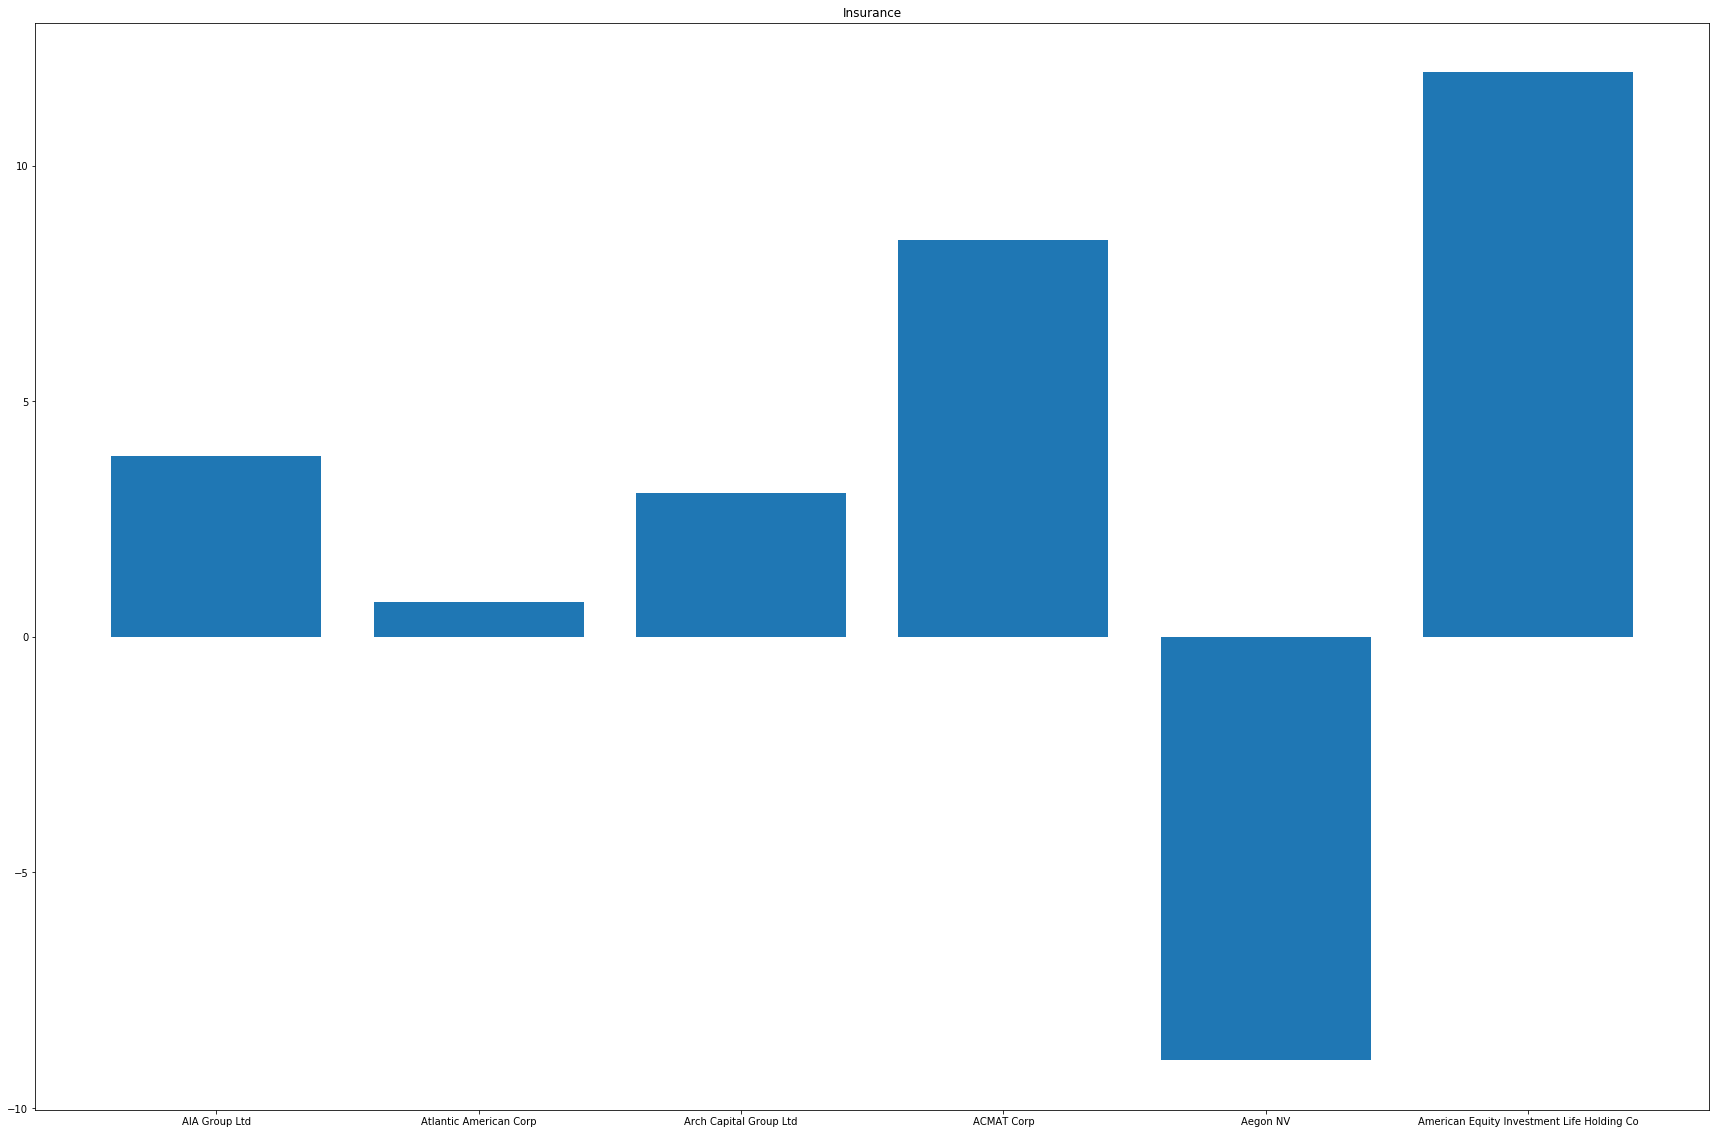

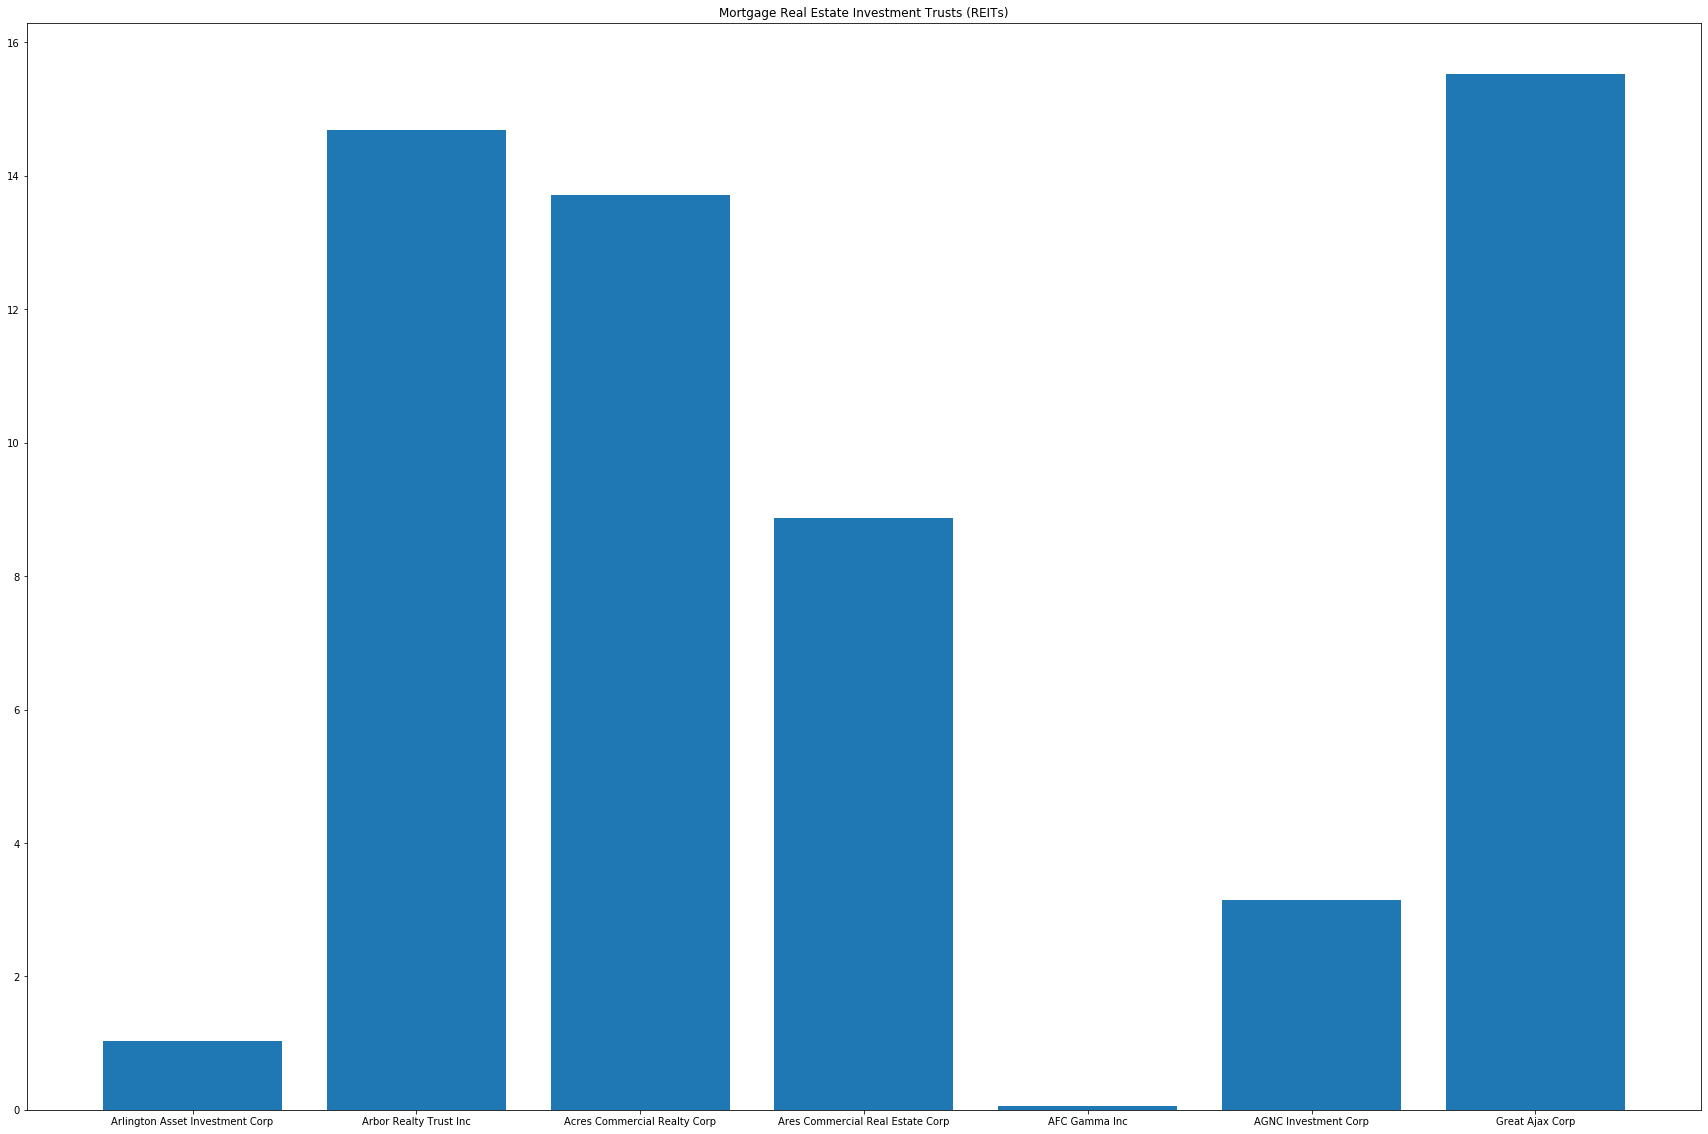

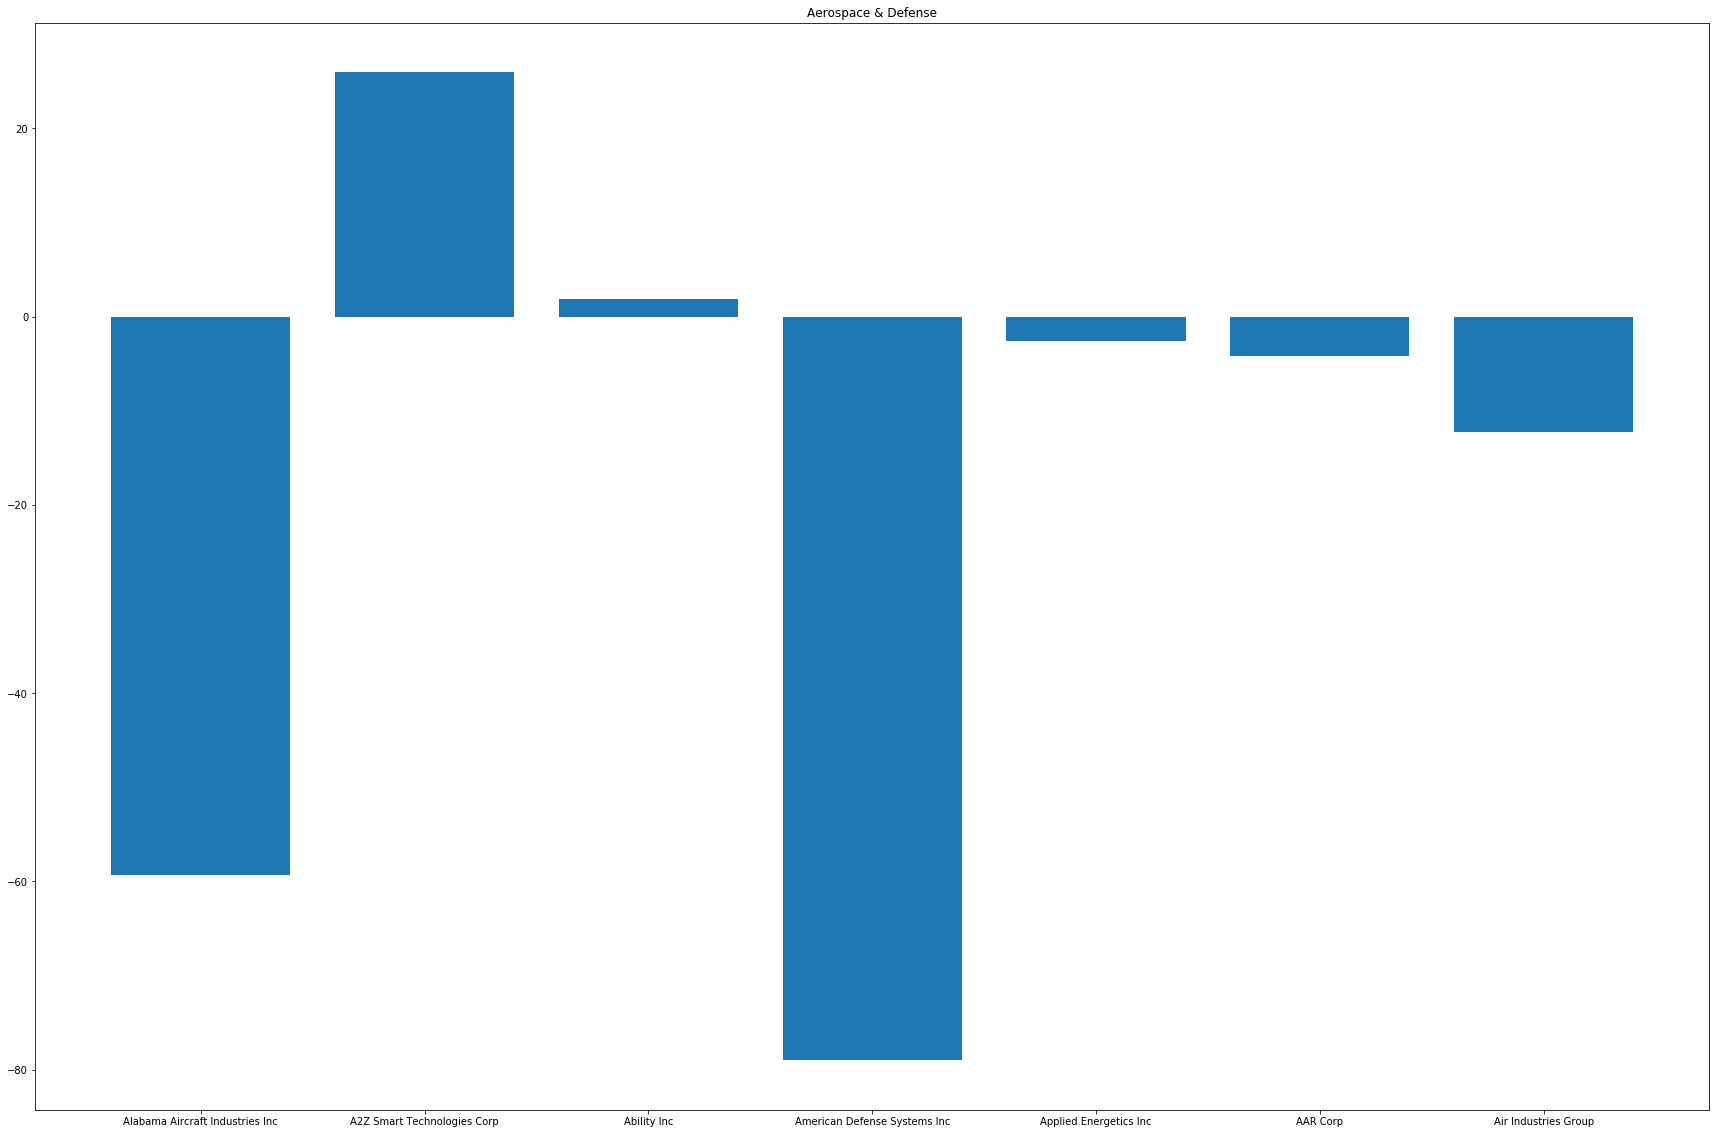

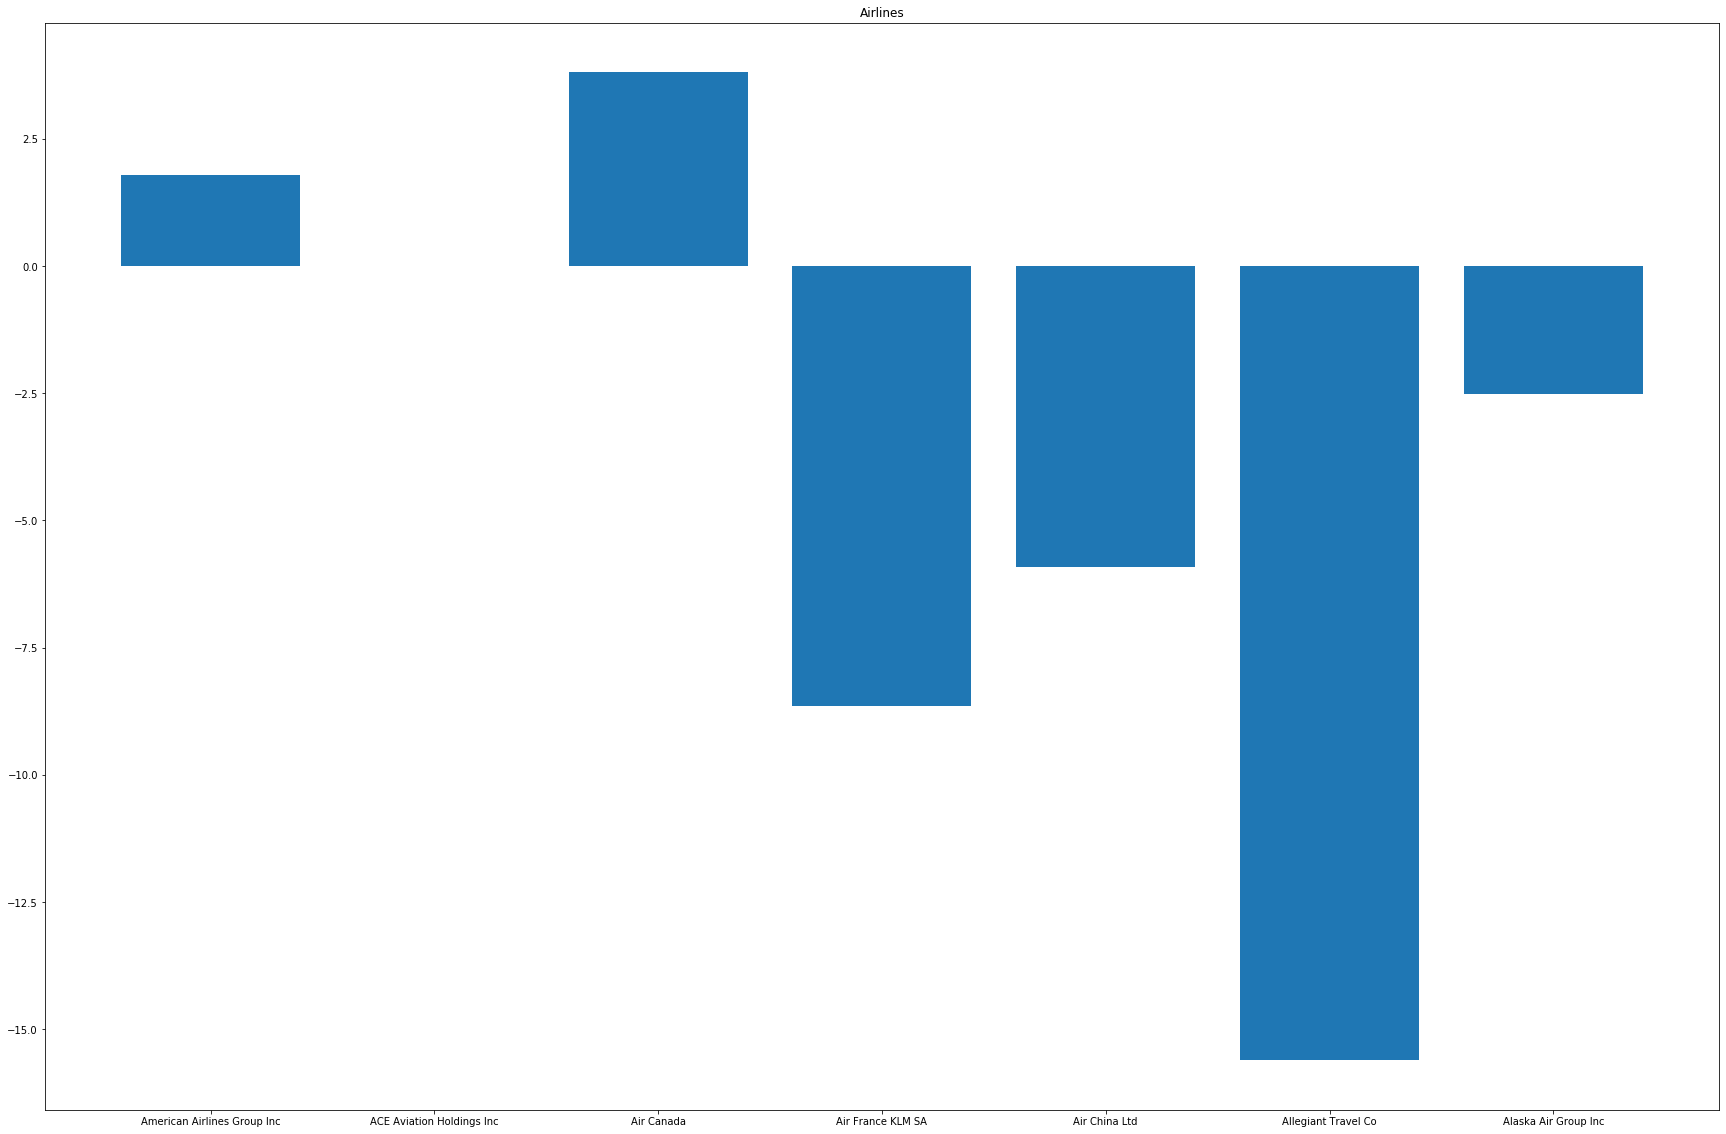

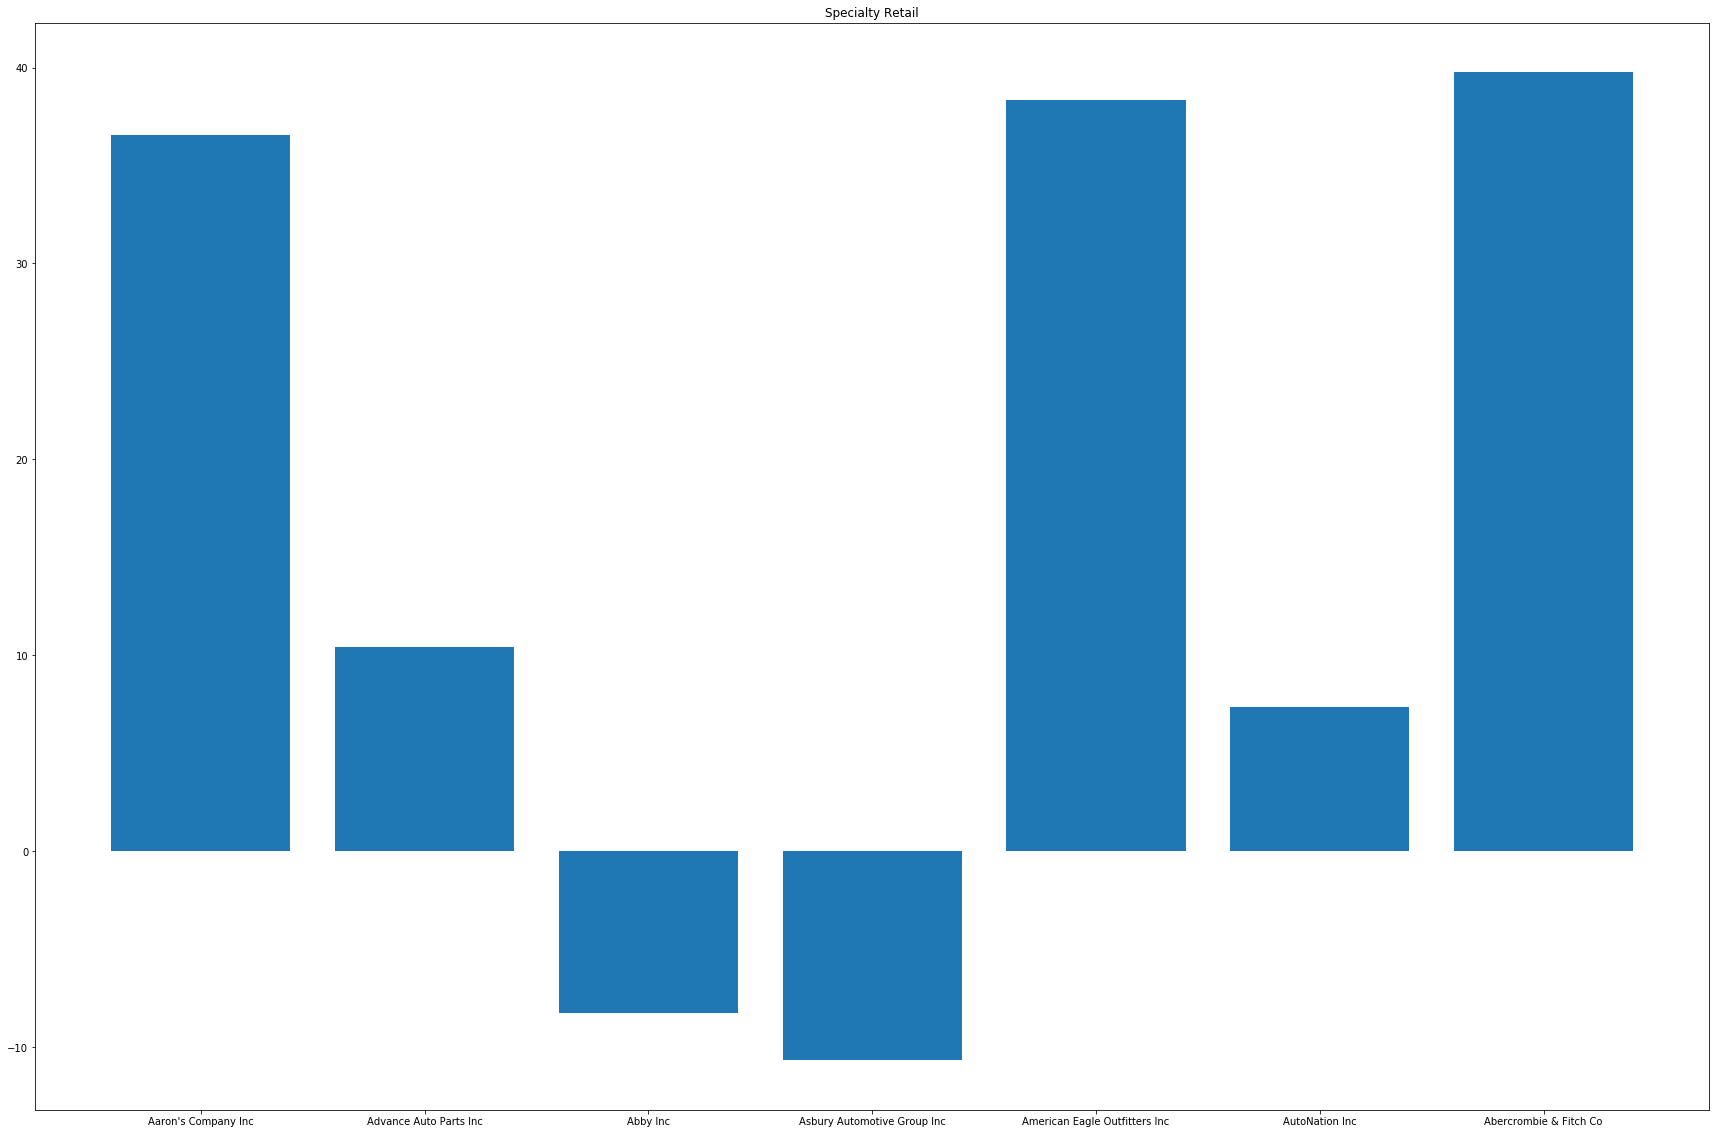

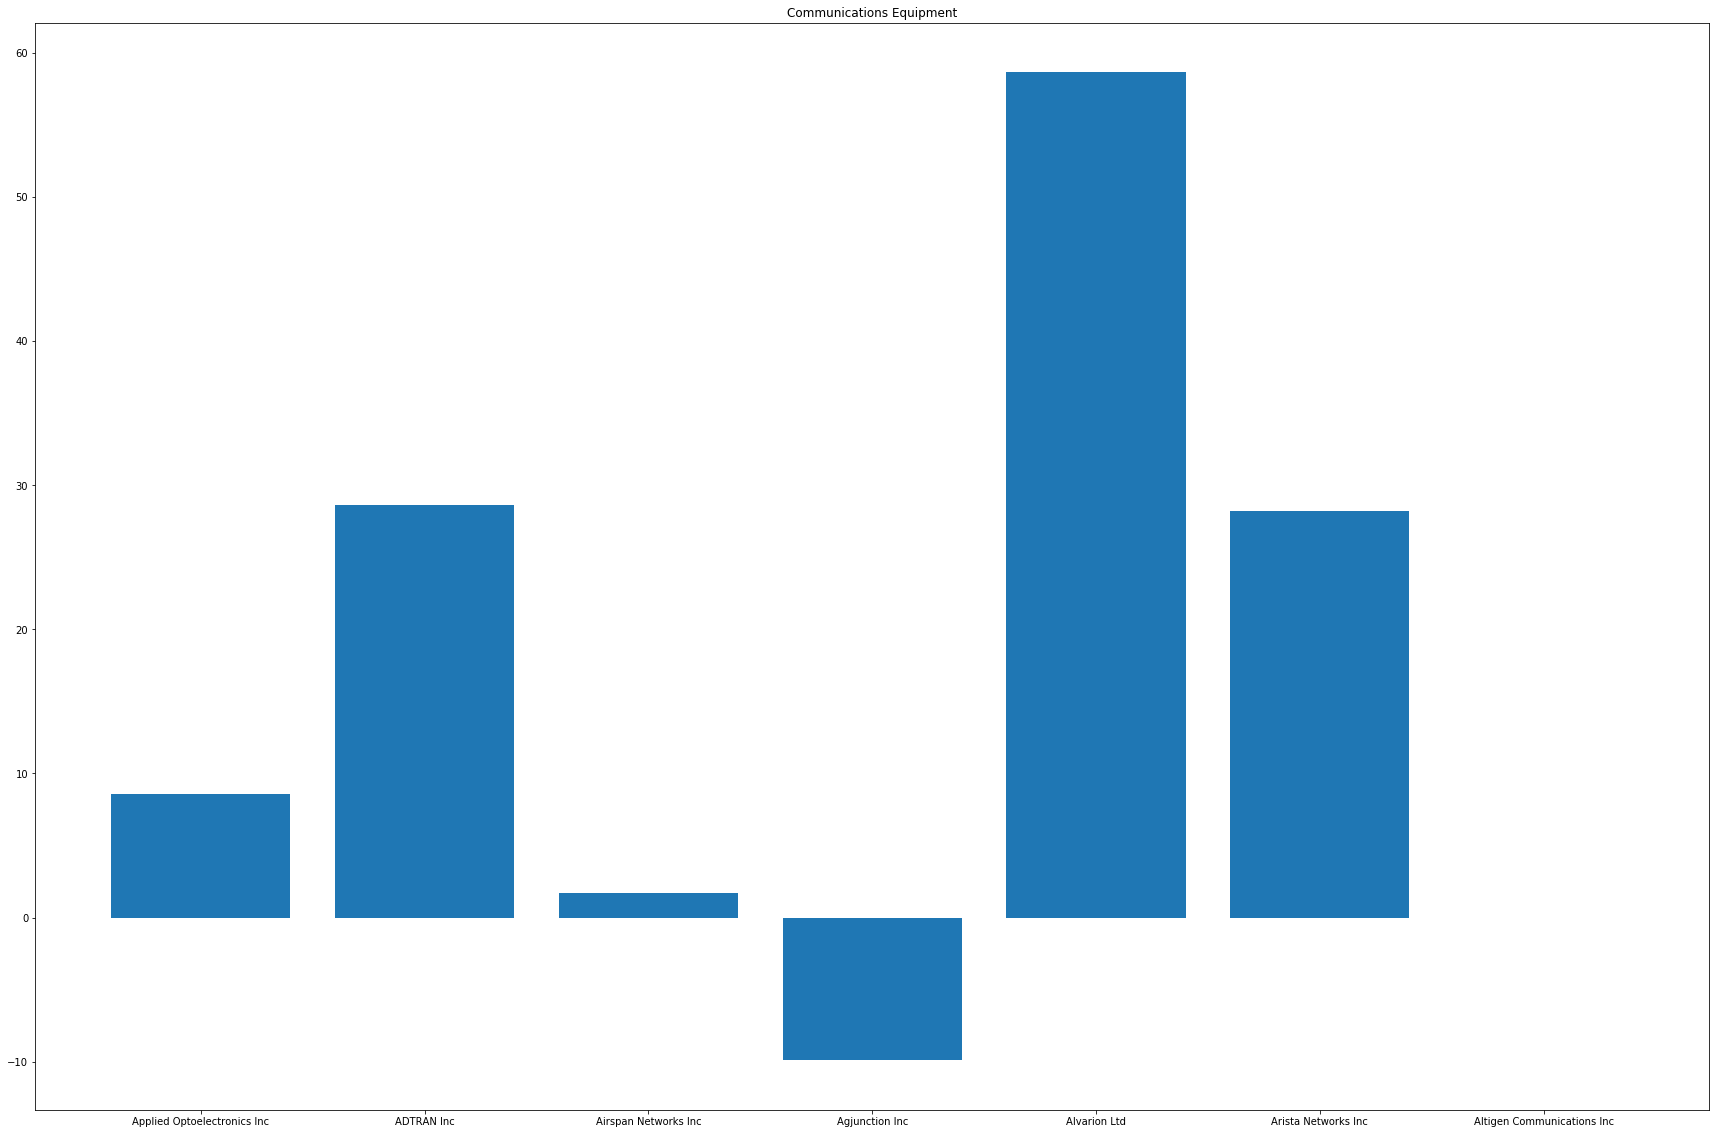

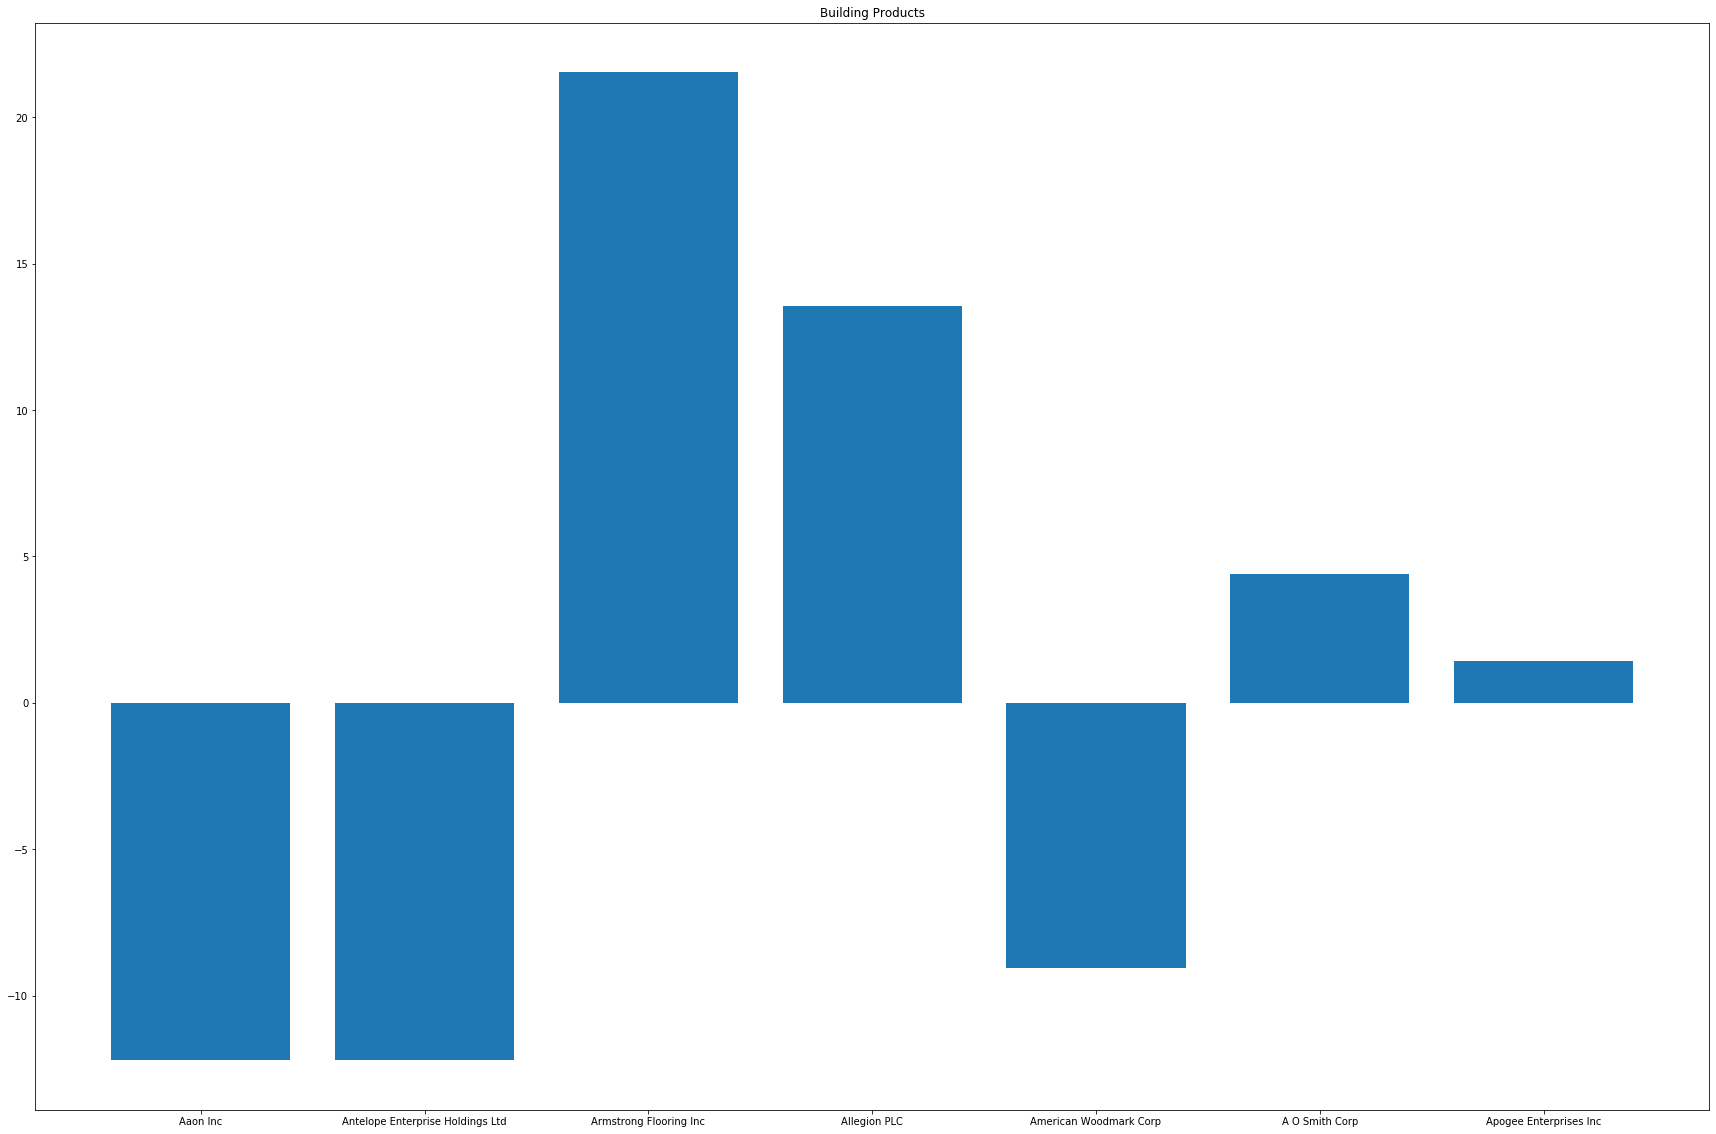

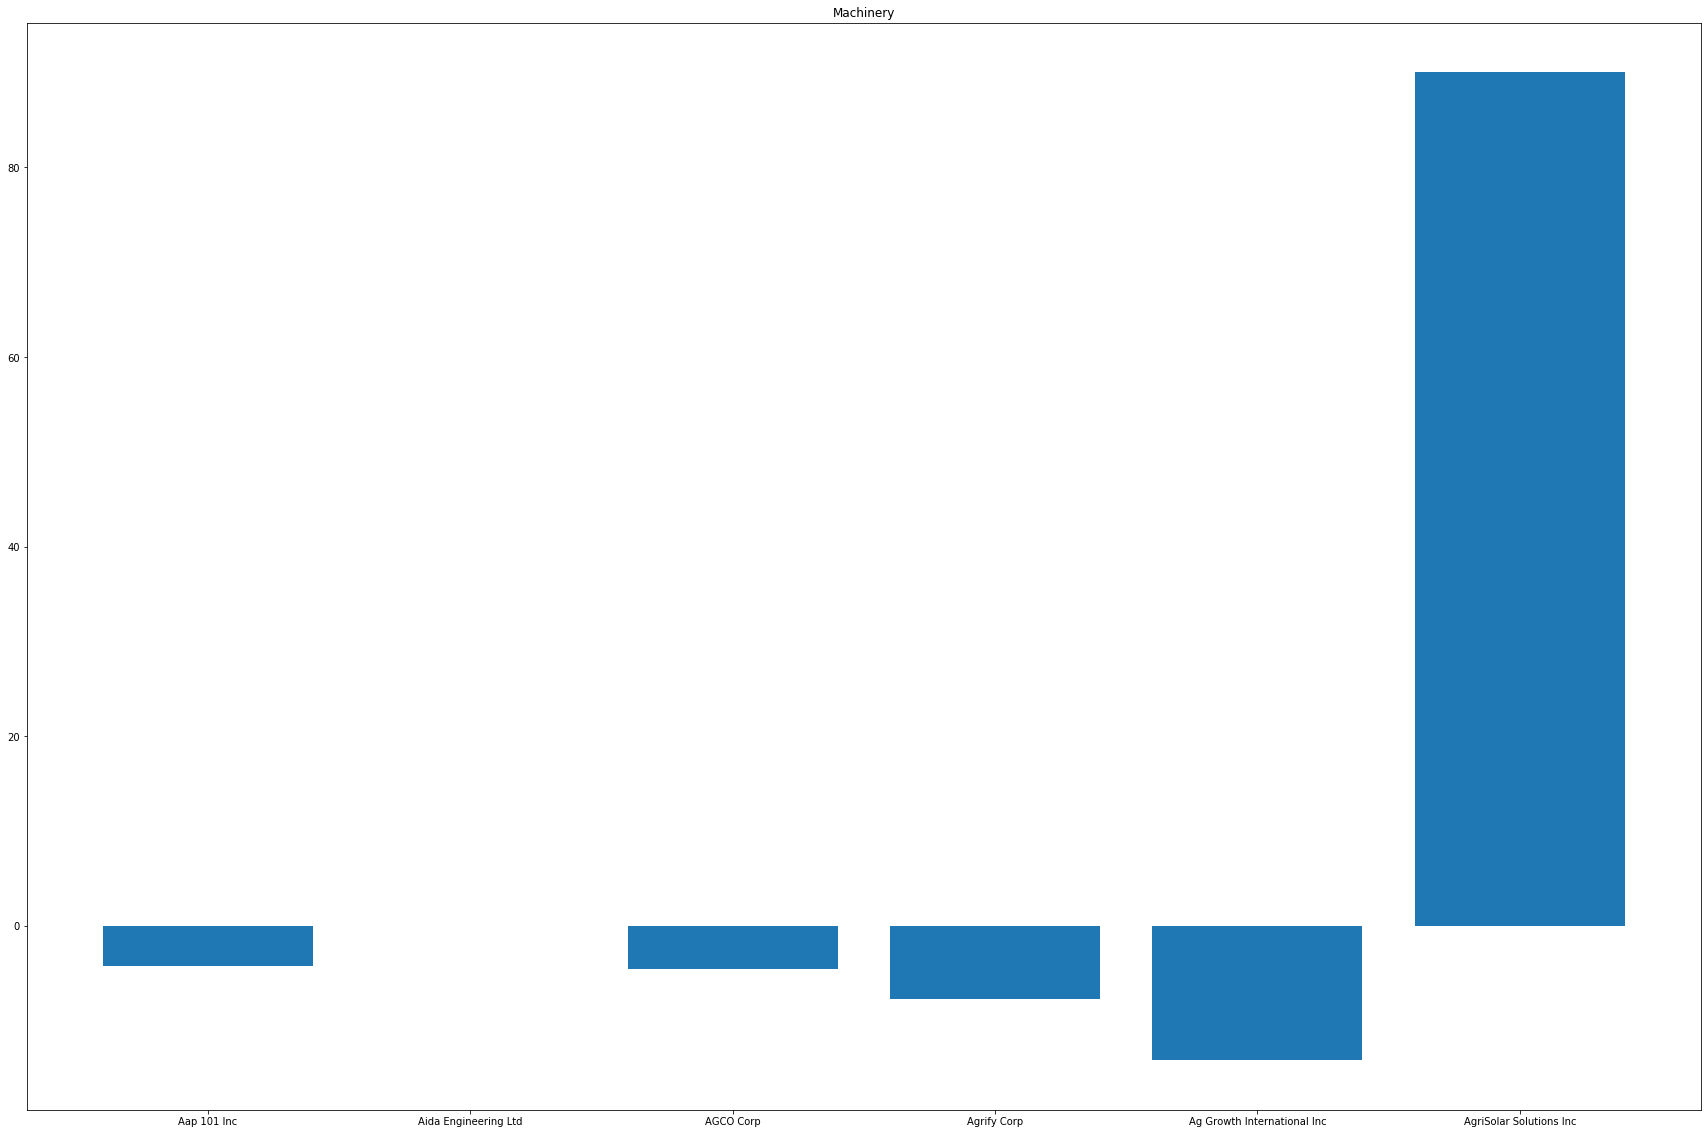

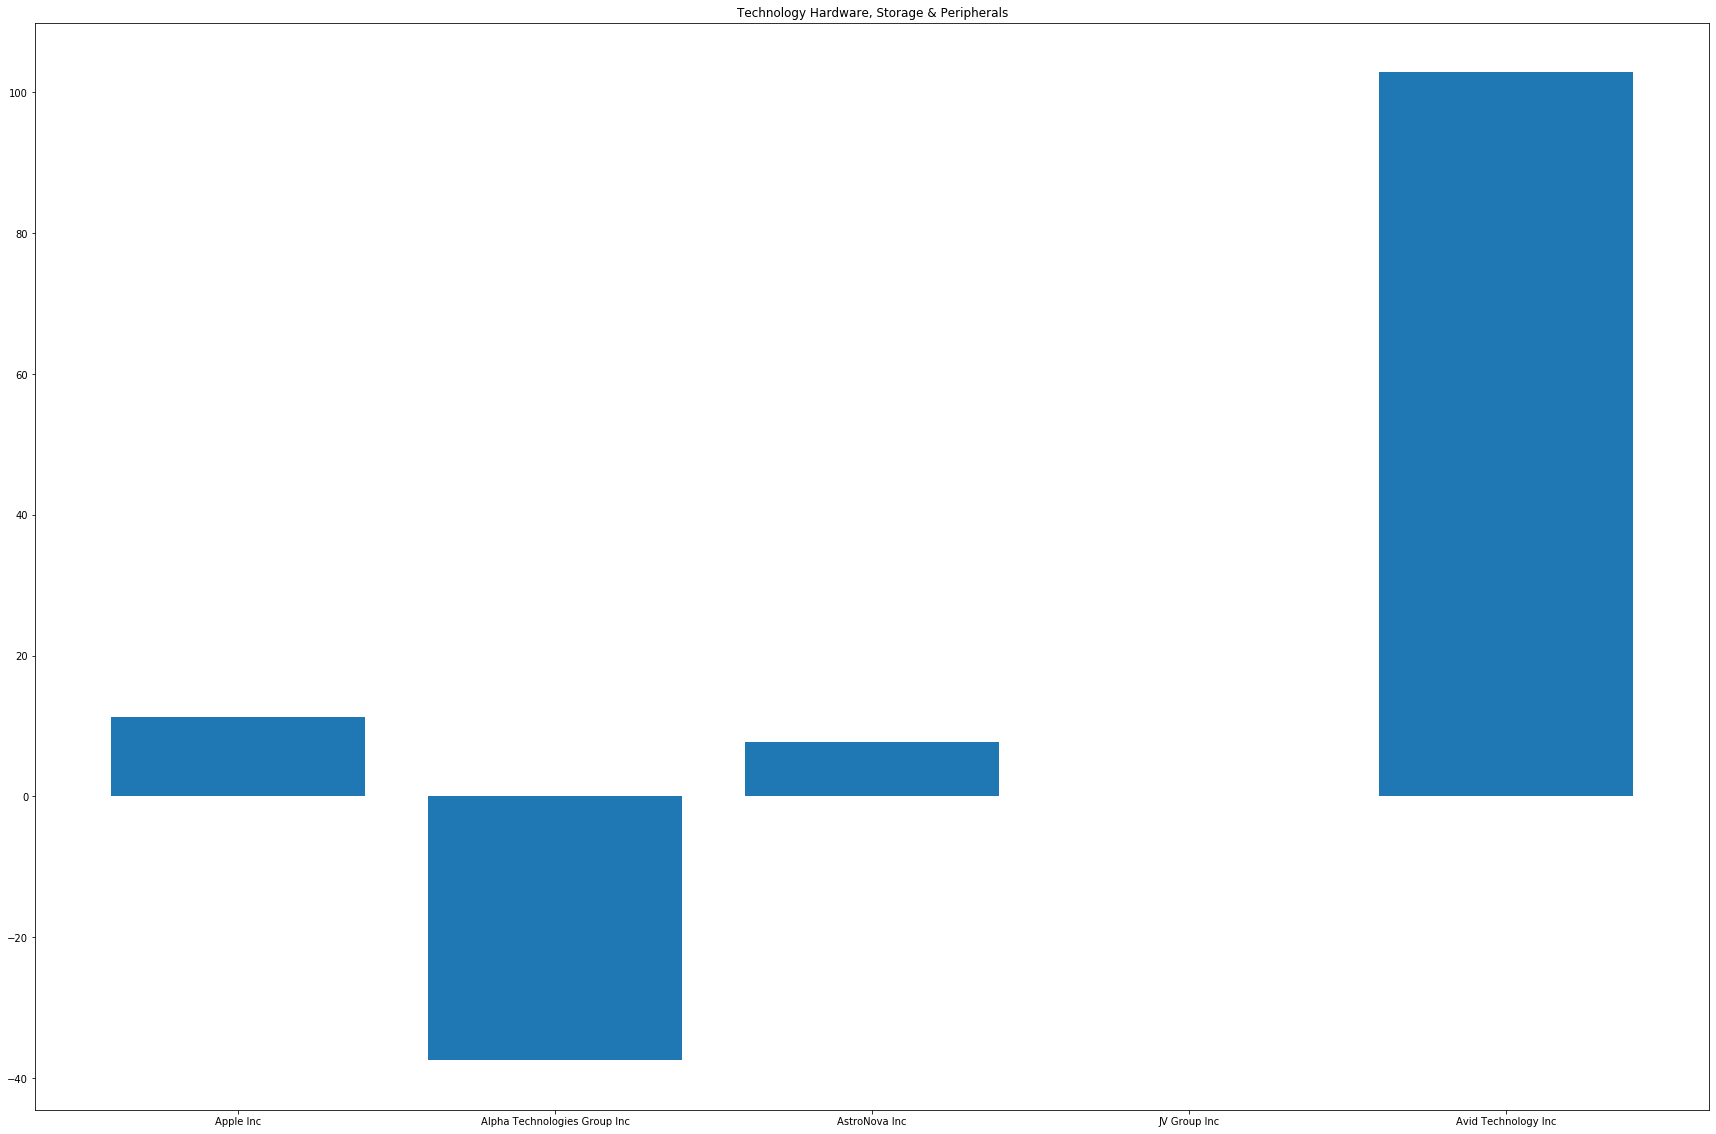

ValueError: could not convert string to float: '1,620.00'

In [53]:
for i in industries:
    industryData = data_by_industry.get_group(i)
    
    #print (i+':')
    
    industryDataFiltered = industryData[["Description","Price Change 3 Months"]]
    industryDataFiltered['Price Change 3 Months']=industryDataFiltered['Price Change 3 Months'].str.rstrip('%')
    industryDataFiltered['Price Change 3 Months'] = industryDataFiltered['Price Change 3 Months'].replace('--',np.nan).astype(float).astype(float)

    plt.bar(industryDataFiltered['Description'][:7], industryDataFiltered['Price Change 3 Months'][:7])
    
    plt.rcParams['figure.figsize']= (30,20)
    plt.title(i)
    plt.show()
